### Monte-Carlo Simulation

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import norm


In [45]:
# !pip install pandas_datareader
# !pip install yfinance

In [46]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [47]:
start_date = "2021-01-01"
# end_date = '2023-02-24'

In [48]:
ticker = 'PG'
df_yf = pdr.get_data_yahoo(ticker, start = start_date)['Adj Close']
df_yf

[*********************100%***********************]  1 of 1 completed


Date
2021-01-04    130.363922
2021-01-05    131.196304
2021-01-06    132.577316
2021-01-07    131.338181
2021-01-08    131.281418
                 ...    
2023-03-29    146.809998
2023-03-30    147.449997
2023-03-31    148.690002
2023-04-03    149.509995
2023-04-04    150.229996
Name: Adj Close, Length: 567, dtype: float64

In [49]:
stock_returns = np.log(1 + df_yf.pct_change())
stock_returns.tail()

Date
2023-03-29    0.003070
2023-03-30    0.004350
2023-03-31    0.008375
2023-04-03    0.005500
2023-04-04    0.004804
Name: Adj Close, dtype: float64

/tmp/ipykernel_911/3051665895.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_returns.iloc[1:])


Text(0, 0.5, 'Frequency')

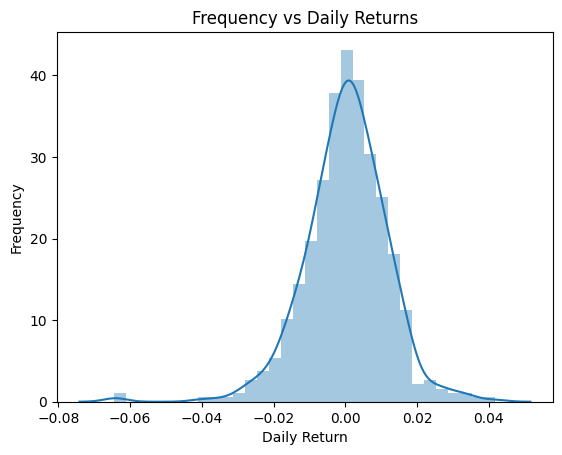

In [76]:
sns.distplot(stock_returns.iloc[1:])
plt.title('Frequency vs Daily Returns')
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Adjusted closing price from 2021-01 to 2023-04')

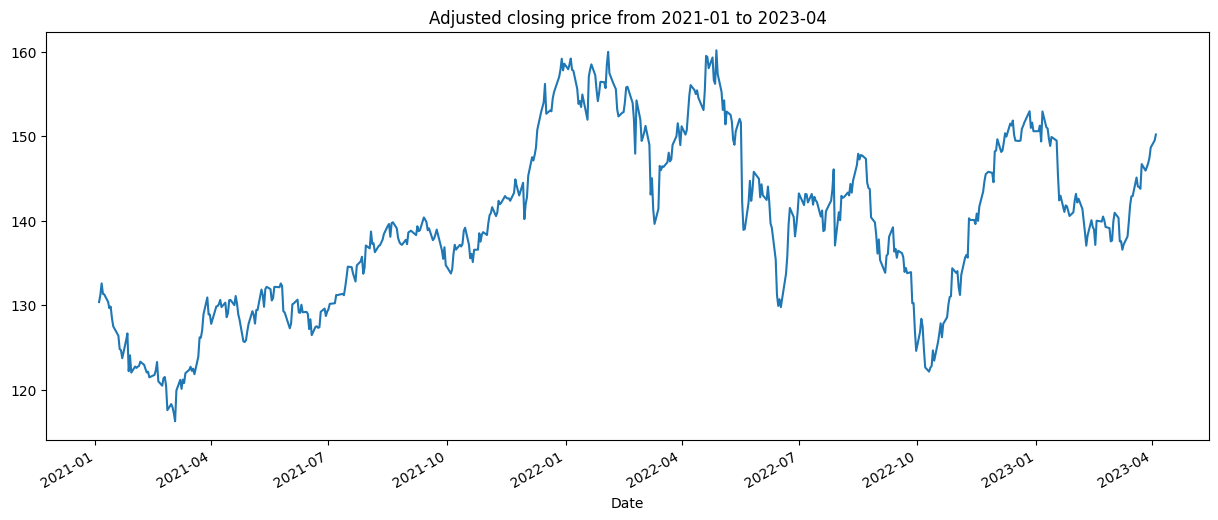

In [75]:
df_yf.plot(figsize=(15,6))
plt.title('Adjusted closing price from 2021-01 to 2023-04')

In [52]:
# stock_returns.plot(figsize=(8,8))

In [53]:
u = stock_returns.mean()
var = stock_returns.var()

Calculate the drift, using the following formula:

drift = u -(var/2)

It is best approximation of feature rate of return of the stock

In [54]:
drift = u - (0.5*var)
drift

0.00018396405992624162

In [55]:
stddev = stock_returns.std()

In [56]:
type(drift)

numpy.float64

In [57]:
type(stddev)

numpy.float64

In [58]:
np.array(drift)

array(0.00018396)

daily_returns = exp((drift) + (stddev) * z)

where z = norm.ppf(np.random.rand(t_intervals, iterations))

In [59]:
x = np.random.rand(10,2)
x

array([[0.78444691, 0.95603729],
       [0.26433539, 0.08611178],
       [0.07364191, 0.3179071 ],
       [0.3848803 , 0.32961408],
       [0.24766538, 0.26183967],
       [0.36743244, 0.38580259],
       [0.5066521 , 0.14107333],
       [0.42493514, 0.22159814],
       [0.53964797, 0.39632799],
       [0.69293415, 0.88486156]])

In [60]:
norm.ppf(x)

array([[ 0.78730014,  1.70644413],
       [-0.63003637, -1.36509383],
       [-1.44919256, -0.47355931],
       [-0.29268806, -0.44097906],
       [-0.6818548 , -0.63768408],
       [-0.33866133, -0.29027589],
       [ 0.01667512, -1.07550954],
       [-0.18928393, -0.76680701],
       [ 0.09954688, -0.26286325],
       [ 0.50418454,  1.19964591]])

In [61]:
stddev = stock_returns.std()
days = 250
iterations = 100
# Create random value with a given shape in the range from 0 to 1 - np.random.rand(10,2)
Z = norm.ppf(np.random.rand(days, iterations))

In [62]:
get_daily_returns = np.exp(drift + stddev * Z)
get_daily_returns

array([[1.00560258, 1.01221579, 1.01128238, ..., 1.00048716, 1.0126765 ,
        0.99422974],
       [0.99951487, 1.02320105, 1.00437262, ..., 1.02011237, 1.00659681,
        0.9938949 ],
       [0.98946998, 1.01615227, 0.99501695, ..., 0.99037955, 1.01058792,
        0.99482194],
       ...,
       [1.01812187, 0.99499956, 1.003338  , ..., 0.98584432, 1.0004697 ,
        0.99363332],
       [0.99739114, 1.01698942, 1.00094577, ..., 1.00103796, 1.00546331,
        0.98746213],
       [1.00283675, 1.00394779, 0.9992278 , ..., 1.01829802, 1.00036284,
        1.01511453]])

In [63]:
len(get_daily_returns)

250

St = S0 . daily_returns

get_daily_returns = daily_returns
S_0 = ? - It will be the current stock price 

In [64]:
S0 = df_yf.iloc[-1]
S0


150.22999572753906

In [65]:
price_paths = np.zeros_like(get_daily_returns)

In [66]:
price_paths.shape

(250, 100)

In [67]:
price_paths

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [69]:
price_paths[0] = S0
price_paths

array([[150.22999573, 150.22999573, 150.22999573, ..., 150.22999573,
        150.22999573, 150.22999573],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [70]:
for t in range(1, days):
    price_paths[t] = price_paths[t -1] * get_daily_returns[t]

In [71]:
price_paths

array([[150.22999573, 150.22999573, 150.22999573, ..., 150.22999573,
        150.22999573, 150.22999573],
       [150.15711534, 153.71548896, 150.88689484, ..., 153.25147662,
        151.22103443, 149.31282597],
       [148.57595766, 156.19834288, 150.13501854, ..., 151.777128  ,
        152.82215092, 148.53967518],
       ...,
       [168.89363239, 191.98221117, 163.03880398, ..., 210.08485742,
        172.18290741, 145.47542059],
       [168.45301261, 195.24387714, 163.19300187, ..., 210.30291681,
        173.12359684, 143.65146904],
       [168.93087117, 196.01465962, 163.06698476, ..., 214.15104474,
        173.18641282, 145.82269326]])

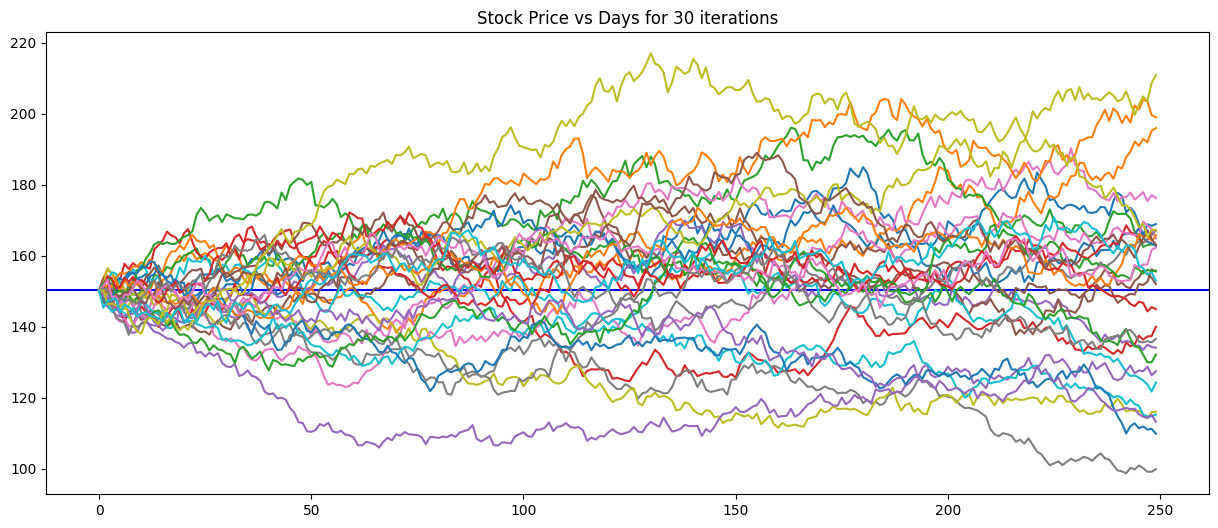

In [74]:
plt.figure(figsize=(15,6))
plt.title('Stock Price vs Days for 30 iterations')
plt.axhline(y = 150.229995, color = 'b', linestyle = '-')
plt.plot(pd.DataFrame(price_paths).iloc[:,0:30])